In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_NG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,NaN,3.5337,0.469590,0.67908,NaN,NaN,NaN,1.69910,NaN,1.746400
1,-0.098505,-0.17857,2.06280,2.9216,0.424720,1.17850,1.68020,1.38880,NaN,2.92360,0.772910,NaN
2,-0.169460,0.50153,2.47090,NaN,1.567600,1.48240,0.92160,2.64240,NaN,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.58809,1.9563,2.787000,2.59570,NaN,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.42970,1.6312,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,NaN,1.57600,NaN,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.10040,1.3461,1.377300,2.28870,0.39613,2.39610,2.46350,NaN,2.461700,1.226700
797,3.344800,-2.38430,2.03100,2.2646,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,NaN,-5.21630,1.57700,1.8440,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	78
float64		column 2	78
float64		column 3	52
float64		column 4	92
float64		column 5	65
float64		column 6	79
float64		column 7	92
float64		column 8	65
float64		column 9	105
float64		column 10	79
float64		column 11	91
float64		column 12	66


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,722.000000,722.000000,748.000000,708.000000,735.000000,721.000000,708.000000,735.000000,695.000000,721.000000,709.000000,734.000000
mean,1.465432,1.326925,1.972866,1.941234,1.994246,2.007900,1.925679,1.986852,1.996543,1.974501,1.944349,1.952989
std,2.656877,3.543904,1.126854,1.142014,1.158926,1.114050,1.164084,1.130221,1.120843,1.138294,1.163510,1.111179
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.359513,-0.536107,1.024275,0.956263,0.997740,1.060000,0.925845,0.987410,1.089950,1.038000,0.919400,0.995457
50%,0.619985,0.920730,1.967400,1.924700,2.023300,2.004600,1.907400,1.982600,1.997200,2.003900,1.912900,1.956350
75%,3.879375,4.425575,2.886000,2.922700,2.966400,2.934200,2.915950,2.874400,2.971750,2.960300,2.940700,2.835850
max,6.982200,7.691000,3.992600,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

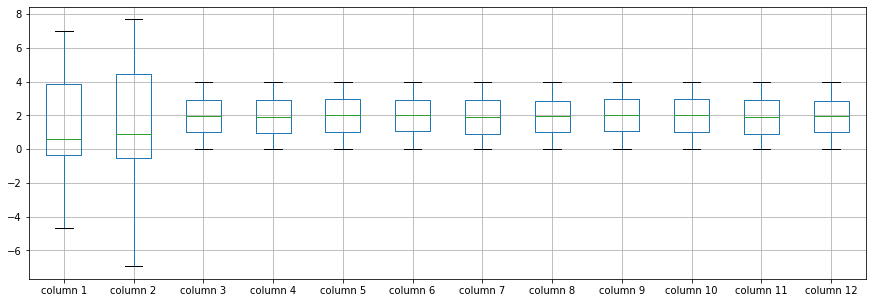

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.465432
column 2     1.326925
column 3     1.972866
column 4     1.941234
column 5     1.994246
column 6     2.007900
column 7     1.925679
column 8     1.986852
column 9     1.996543
column 10    1.974501
column 11    1.944349
column 12    1.952989
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.379218,-0.016382,0.041394,0.027610,0.017243,-0.058264,0.045618,0.058868,0.006190,0.021472,0.021959
column 2,-0.379218,1.000000,-0.007266,-0.046499,-0.048949,-0.017919,0.043334,0.012014,-0.007121,-0.038657,-0.081820,-0.005603
column 3,-0.016382,-0.007266,1.000000,-0.058726,0.064766,-0.009267,-0.028840,0.017032,0.008508,-0.006289,-0.028596,0.021683
column 4,0.041394,-0.046499,-0.058726,1.000000,0.009130,-0.028123,0.022260,0.105369,-0.051806,0.025537,0.019018,-0.037084
column 5,0.027610,-0.048949,0.064766,0.009130,1.000000,0.079189,0.013654,0.000638,0.012522,-0.006529,-0.020967,0.012937
column 6,0.017243,-0.017919,-0.009267,-0.028123,0.079189,1.000000,-0.086281,0.046303,0.020301,0.022677,-0.037420,0.012009
column 7,-0.058264,0.043334,-0.028840,0.022260,0.013654,-0.086281,1.000000,-0.049524,-0.021254,-0.060445,-0.003789,-0.017423
column 8,0.045618,0.012014,0.017032,0.105369,0.000638,0.046303,-0.049524,1.000000,-0.047858,-0.036526,-0.035620,-0.052132
column 9,0.058868,-0.007121,0.008508,-0.051806,0.012522,0.020301,-0.021254,-0.047858,1.000000,0.028345,-0.012239,-0.008910
column 10,0.006190,-0.038657,-0.006289,0.025537,-0.006529,0.022677,-0.060445,-0.036526,0.028345,1.000000,-0.072604,0.027260


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+78,12+78+78,12+78+78,12+78+78+78+78,12+78+78+78,12+78+78,12+78,12], vae_layer = False, seed = 80)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.37530818939209
Epoch: 1 , loss: 26.02890438079834
Epoch: 2 , loss: 23.761691513061525
Epoch: 3 , loss: 21.56195987701416
Epoch: 4 , loss: 20.880897483825684
Epoch: 5 , loss: 20.336822624206544
Epoch: 6 , loss: 19.94886161804199
Epoch: 7 , loss: 19.703225746154786
Epoch: 8 , loss: 19.39648857116699
Epoch: 9 , loss: 18.88373718261719
Epoch: 10 , loss: 18.768438873291014
Epoch: 11 , loss: 18.64515869140625
Epoch: 12 , loss: 18.58208065032959
Epoch: 13 , loss: 18.479046897888182
Epoch: 14 , loss: 18.15941623687744
Epoch: 15 , loss: 17.995922355651857
Epoch: 16 , loss: 18.116972122192383
Epoch: 17 , loss: 18.049709854125975
Epoch: 18 , loss: 17.813011379241942
Epoch: 19 , loss: 17.857761249542236
Epoch: 20 , loss: 17.711716232299803
Epoch: 21 , loss: 17.641263790130616
Epoch: 22 , loss: 17.66675666809082
Epoch: 23 , loss: 17.80603548049927
Epoch: 24 , loss: 17.60610845565796
Epoch: 25 , loss: 17.40835618

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     1.417411
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    1.378115
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.000000,1.238825,0.000000,0.0,0.0,-2.150666,-1.494463,-1.438543,0.000000,-2.561913,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-2.086219,0.000000,0.000000,0.477183
2,0.000000,0.000000,0.000000,-1.168523,0.0,0.0,0.000000,0.000000,0.407133,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-0.327187,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,3.285924,0.000000,0.519046,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
796,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.138304,0.000000,0.000000
797,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
798,-2.941653,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(65.06104799326178, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.2621082975383418

In [18]:
new_df.iloc[66,:]

column 1     0.207620
column 2    -0.550520
column 3     2.339900
column 4     1.794800
column 5     1.401300
column 6     2.765800
column 7     1.483149
column 8     1.249300
column 9     1.059400
column 10    1.284300
column 11    1.879400
column 12    0.575240
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.161340,1.306176,3.533700,0.469590,0.67908,1.283734,1.297937,1.337757,1.699100,1.253687,1.746400
1,-0.098505,-0.178570,2.062800,2.921600,0.424720,1.17850,1.680200,1.388800,1.130481,2.923600,0.772910,1.118633
2,-0.169460,0.501530,2.470900,1.896477,1.567600,1.48240,0.921600,2.642400,1.925833,2.531800,2.432800,1.876800
3,-0.136050,0.472790,0.588090,1.956300,2.787000,2.59570,2.566113,1.537500,0.999420,3.659300,0.618250,3.265800
4,0.098830,0.234180,0.429700,1.631200,3.554100,2.27110,0.374250,2.178600,1.314000,1.063200,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,0.599224,1.576000,1.075166,0.070769,2.07470,0.803040,3.222900,3.493300,1.325500,3.231100,0.005387
796,3.466600,-4.034600,3.100400,1.346100,1.377300,2.28870,0.396130,2.396100,2.463500,1.805804,2.461700,1.226700
797,3.344800,-2.384300,2.031000,2.264600,3.341200,1.53700,1.225600,0.740270,2.495400,1.343300,1.622500,1.585300
798,0.499747,-5.216300,1.577000,1.844000,1.098700,3.42430,0.810810,3.727000,1.187900,0.951120,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_NG_10(imp).xlsx", index=False, header=False)